In [2]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Deep Learning Libraries


from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno


# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [3]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");


# Make Visualizations better
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [4]:
import os
print(os.listdir('Recommender-Systems-with-Collaborative-Filtering-and-Deep-Learning-Techniques\ml-latest-small'))

['Data Cleaning Excel Tutorial.xlsx', 'links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


In [5]:
ratings = pd.read_csv(r'Recommender-Systems-with-Collaborative-Filtering-and-Deep-Learning-Techniques\ml-latest-small\ratings.csv')
movies = pd.read_csv(r'Recommender-Systems-with-Collaborative-Filtering-and-Deep-Learning-Techniques\ml-latest-small\movies.csv')
df_r = ratings.copy()
df_m = movies.copy()

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
ratings.shape


(100836, 4)

In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
ratings.drop(['timestamp'], axis=1, inplace=True)

In [10]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
print('Shape: ', movies.shape, '\n')
movies.info()

Shape:  (9742, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [13]:
df_combined = pd.merge(ratings, movies, on = 'movieId')

In [14]:
import pandas as pd

# Assuming 'df' is your DataFrame
num_rows, num_columns = df_combined.shape
column_names = df_combined.columns.tolist()

print(f"Number of rows in the dataset: {num_rows}")
print(f"Number of columns in the dataset: {num_columns}")
print(f"Column names in the dataset: {column_names}")


Number of rows in the dataset: 100836
Number of columns in the dataset: 5
Column names in the dataset: ['userId', 'movieId', 'rating', 'title', 'genres']


In [15]:
df_combined.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [16]:
import pandas as pd

# Assuming 'df_combined' is your DataFrame
missing_values_table = pd.DataFrame(df_combined.isnull().sum(), columns=['Missing Values'])
missing_values_table['Attribute'] = missing_values_table.index
missing_values_table.index = range(1, len(missing_values_table) + 1)
missing_values_table = missing_values_table[['Attribute', 'Missing Values']]

print("Table of Missing Values:")
print(missing_values_table)


Table of Missing Values:
  Attribute  Missing Values
1    userId               0
2   movieId               0
3    rating               0
4     title               0
5    genres               0


In [17]:
df_combined.shape

(100836, 5)

In [18]:
# Create a function to find genres in the dataset

genres = {} # create a dictionary to store different genre values

def find_genres():
    for genre in movies['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
            
find_genres()

In [19]:
genres

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [20]:
genres['None'] = genres.pop('(no genres listed)')

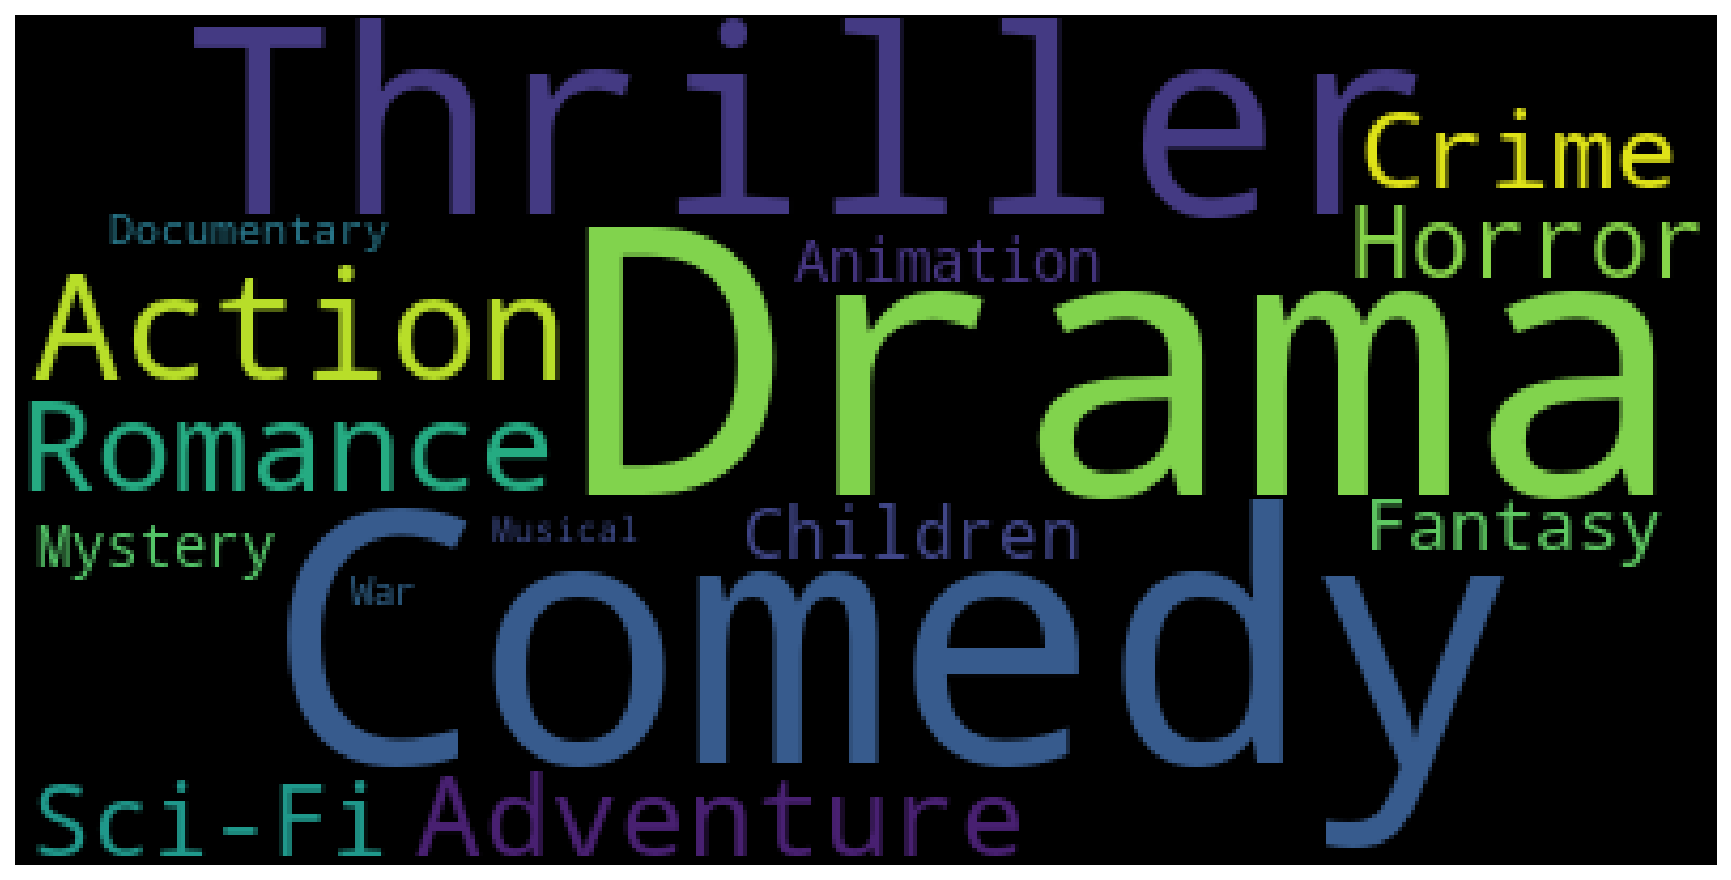

In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=400, height=200, background_color = 'black', min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
df_n_ratings = pd.DataFrame(df_combined.groupby('title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

df_n_ratings.sort_values('total ratings', ascending=False).head(20)

,mean ratings,total ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


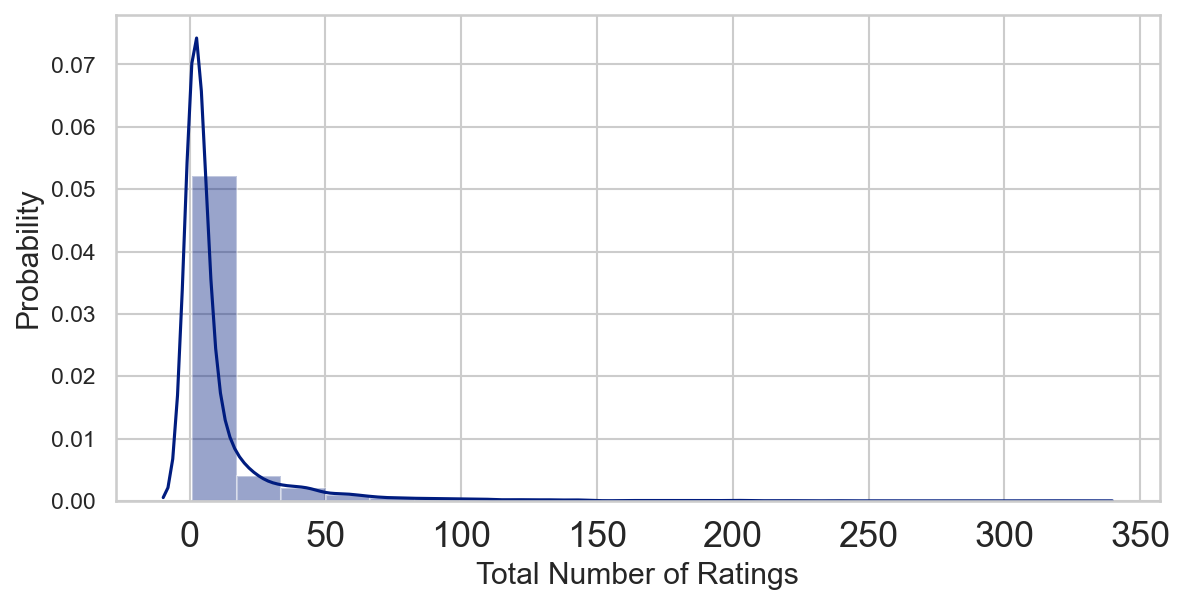

In [23]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['total ratings'], bins=20)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.show()

In [24]:
df_n_ratings.sort_values('mean ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
"Thin Line Between Love and Hate, A (1996)",5.0,1
Lesson Faust (1994),5.0,2
Eva (2011),5.0,1
Who Killed Chea Vichea? (2010),5.0,1


In [25]:
print('Total no of users that gave rating of 5.0 : ', len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5) 
                                                                           & (df_n_ratings['total ratings'] == 1)]))

Total no of users that gave rating of 5.0 :  296 

Total no of Individual users that gave rating of 5.0 :  289


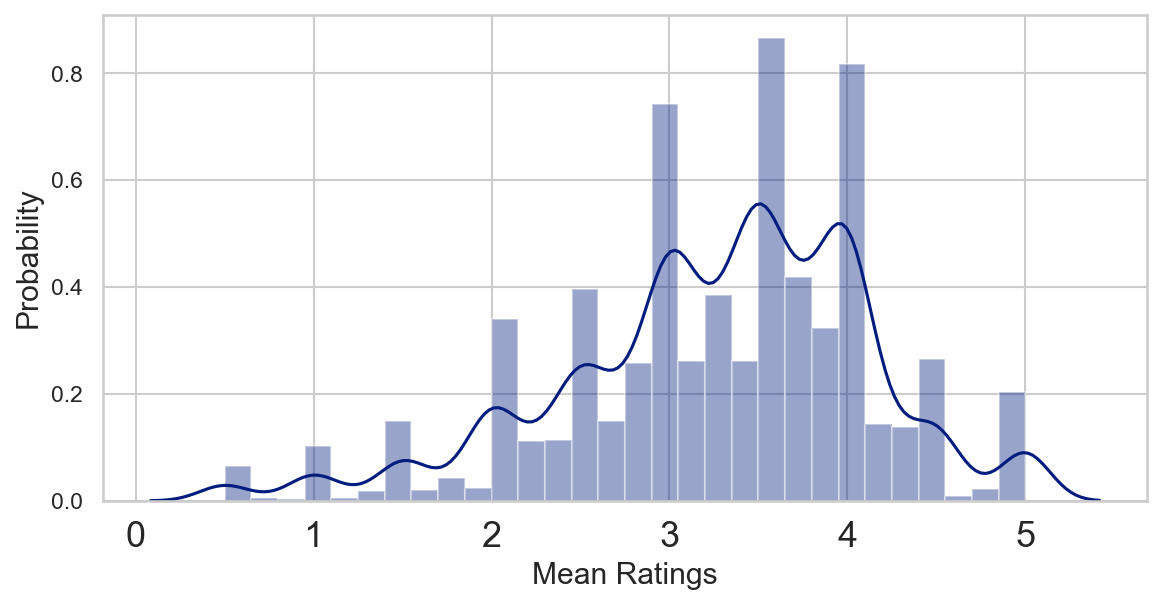

In [26]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['mean ratings'], bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Probability')
plt.show()

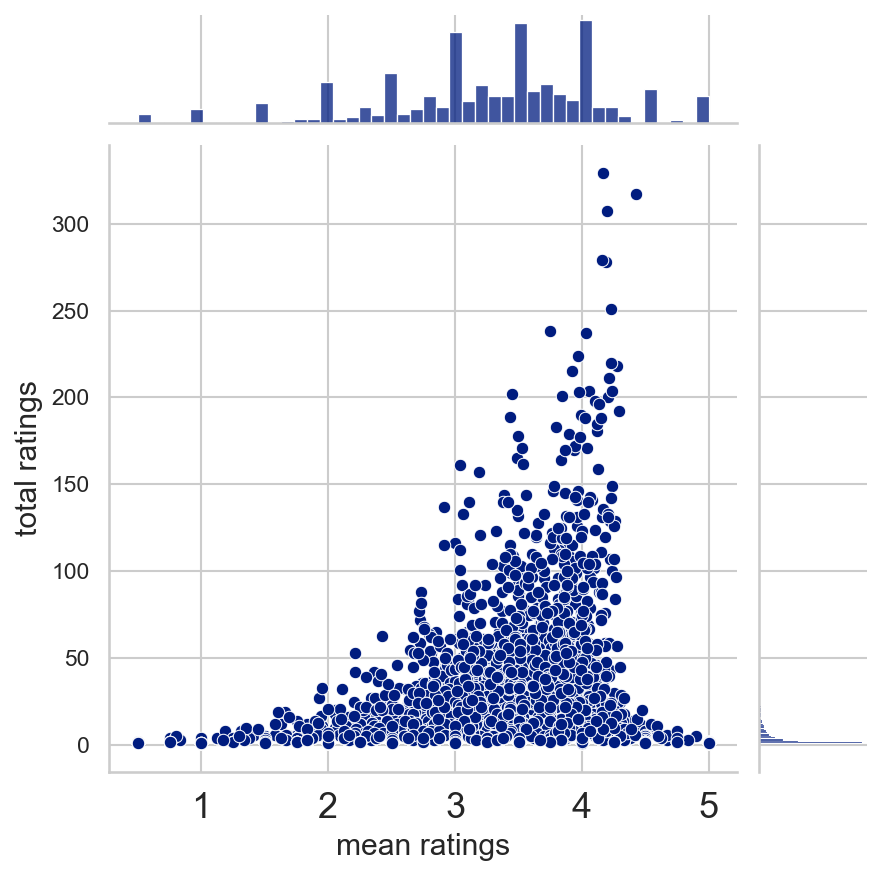

In [27]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_n_ratings )

In [28]:
util_mat = df_combined.pivot_table(index = 'userId', columns = 'title', values = 'rating')
util_mat.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [29]:
user_util_matrix = util_mat.copy()

# We will fill the row wise NaN's with the corresponding user's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the movie that is not rated.
user_util_matrix = user_util_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)
user_util_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [30]:
user_util_matrix.T.corr()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,1.000000e+00,-4.975816e-17,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,7.652805e-16,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-1.265569e-15,-6.430371e-16,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,-4.975816e-17,1.000000e+00,-0.011260,-0.031539,0.004800,-2.587070e-16,-0.032471,-4.812885e-16,3.774064e-16,...,-0.004904,-0.016117,0.017749,-8.106536e-16,-1.430628e-03,-0.037289,-0.007789,-0.013001,-1.168878e-16,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,1.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,1.000000,0.009111,1.011715e-02,-0.012284,7.750436e-16,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,6.225827e-03,-3.728895e-02,0.020590,0.026319,-0.009137,2.832591e-02,0.022277,3.163273e-02,-3.994577e-02,...,0.053683,0.016384,0.098011,6.107833e-02,1.967830e-02,1.000000,0.017927,0.056676,3.842210e-02,0.075464
607,0.055261,-2.050374e-02,-7.789105e-03,0.014628,0.031896,0.045501,3.098070e-02,0.048822,-1.216061e-02,-1.765576e-02,...,0.049059,0.038197,0.049317,2.355180e-03,-2.938114e-02,0.017927,1.000000,0.044514,1.904919e-02,0.021860
608,0.075224,-6.000828e-03,-1.300064e-02,-0.037569,-0.001751,0.021727,2.841409e-02,0.071759,3.278284e-02,-5.199963e-02,...,0.069198,0.051388,0.012801,6.318649e-03,-7.977761e-03,0.056676,0.044514,1.000000,5.071449e-02,0.054454


In [31]:
user_corr_mat = user_util_matrix.T.corr()
corr_user_1 = user_corr_mat.iloc[0]

In [32]:
corr_user_1.sort_values(ascending=False, inplace=True)

In [33]:
corr_user_1

userId
1      1.000000
301    0.124799
597    0.102631
414    0.101348
477    0.099217
         ...   
71    -0.082932
370   -0.086678
501   -0.090018
579   -0.105003
53          NaN
Name: 1, Length: 610, dtype: float64

In [34]:
# NaN values are generated in corr() as the std dev is zero, which is required in calculating Pearson Similarity.
corr_user_1.dropna(inplace = True)

In [35]:
# Neglect the 1st corr value as it is user1 itself
top50_corr_users = corr_user_1[1:51]

In [36]:
df_combined[ df_combined['userId'] == 1]

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
16056,1,3744,4.0,Shaft (2000),Action|Crime|Thriller
16075,1,3793,5.0,X-Men (2000),Action|Adventure|Sci-Fi
16208,1,3809,4.0,What About Bob? (1991),Comedy
16243,1,4006,4.0,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi


In [37]:
# user1 has not rated 32 movie
df_combined[ (df_combined['userId'] == 1) & (df_combined['movieId'] == 32) ] 

,userId,movieId,rating,title,genres


In [38]:
print('32nd Movie : ', movies['title'][ movies['movieId'] == 32 ].values)

32nd Movie :  ['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']


In [39]:
df_n_ratings.loc[['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']]

,mean ratings,total ratings
title,,
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3.983051,177


In [40]:
top50_users = top50_corr_users.keys()

count = 0
users = list()
for user in top50_users:
    if df_combined[ (df_combined['userId'] == user) & (df_combined['movieId'] == 32) ]['rating'].sum()  :
        count +=1
        users.append(user)

print(count)

30


In [41]:
# Let's define a function to calculate what user1 will rate the movie
# We use Weighted average of k similar users

def predict_rating():
    sum_similarity = 0
    weighted_ratings = 0
    for user in users:
        weighted_ratings += top50_corr_users.loc[user] * df_combined[ (df_combined['userId'] == user) & 
                                                              (df_combined['movieId'] == 32) ]['rating'].sum()
        sum_similarity += top50_corr_users.loc[user]

    print(weighted_ratings / sum_similarity)
    
    
predict_rating()

4.1368953015974315


In [42]:
df_m[ df_m['movieId'] == 32]

,movieId,title,genres
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


In [43]:
df_n_ratings.loc[['Jurassic Park (1993)']]

,mean ratings,total ratings
title,,
Jurassic Park (1993),3.75,238


In [44]:
item_util_matrix = util_mat.copy()
item_util_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [45]:
# We will fill the column wise NaN's with the corresponding movie's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the user that has not a rated movie.

item_util_matrix = item_util_matrix.apply(lambda col : col.fillna(col.mean()), axis=0)
item_util_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,4.000000,1.0
2,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
3,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
4,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
5,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0


In [46]:
item_util_matrix.isna().sum().sum()

0

In [47]:
item_util_matrix.corr()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.000000e+00,NaN,-2.470228e-17,NaN,-6.783236e-16,-4.090781e-16,...,NaN,1.491400e-15,-2.970631e-18,NaN,NaN,-1.174172e-16,-4.643126e-16,-1.457468e-15,2.901144e-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,-1.174172e-16,NaN,6.069910e-02,NaN,-7.527708e-02,2.947366e-02,...,NaN,-1.447002e-15,-3.196632e-16,NaN,NaN,1.000000e+00,3.784587e-02,1.243849e-15,-3.410933e-02,NaN
xXx (2002),NaN,NaN,NaN,NaN,-4.643126e-16,NaN,-3.527098e-03,NaN,1.558884e-01,2.511177e-01,...,NaN,-2.067568e-01,-4.854206e-03,NaN,NaN,3.784587e-02,1.000000e+00,2.449296e-01,1.854832e-02,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,-1.457468e-15,NaN,6.027298e-16,NaN,1.107823e-01,-1.311693e-15,...,NaN,-2.014024e-01,7.715167e-02,NaN,NaN,1.243849e-15,2.449296e-01,1.000000e+00,1.034849e-15,NaN


In [48]:
item_corr_matrix = item_util_matrix.corr()

In [49]:
jurassic_park_corr = item_corr_matrix['Jurassic Park (1993)']
jurassic_park_corr = jurassic_park_corr.sort_values(ascending=False)
jurassic_park_corr.dropna(inplace=True)

In [50]:
movies_similar_to_jurassic_park = pd.DataFrame(data=jurassic_park_corr.values, columns=['Correlation'], 
                                               index = jurassic_park_corr.index)
movies_similar_to_jurassic_park = movies_similar_to_jurassic_park.join(df_n_ratings['total ratings'])
movies_similar_to_jurassic_park.head(10)

,Correlation,total ratings
title,,
Jurassic Park (1993),1.000000,238
"Fugitive, The (1993)",0.324717,190
Lethal Weapon (1987),0.318646,75
Independence Day (a.k.a. ID4) (1996),0.263629,202
Mission: Impossible (1996),0.258080,162
Ghostbusters (a.k.a. Ghost Busters) (1984),0.256527,120
Mulan (1998),0.255672,45
Rise of the Planet of the Apes (2011),0.248134,27
"Bug's Life, A (1998)",0.240964,92


In [51]:
movies_similar_to_jurassic_park = movies_similar_to_jurassic_park[1:]
movies_similar_to_jurassic_park[ movies_similar_to_jurassic_park['total ratings'] > 100 ].sort_values(ascending=False,
                                                                                          by=['Correlation']).head(10)

,Correlation,total ratings
title,,
"Fugitive, The (1993)",0.324717,190
Independence Day (a.k.a. ID4) (1996),0.263629,202
Mission: Impossible (1996),0.258080,162
Ghostbusters (a.k.a. Ghost Busters) (1984),0.256527,120
Indiana Jones and the Temple of Doom (1984),0.239826,108
Die Hard (1988),0.239294,145
Aladdin (1992),0.227711,183
Braveheart (1995),0.222085,237
Speed (1994),0.220720,171


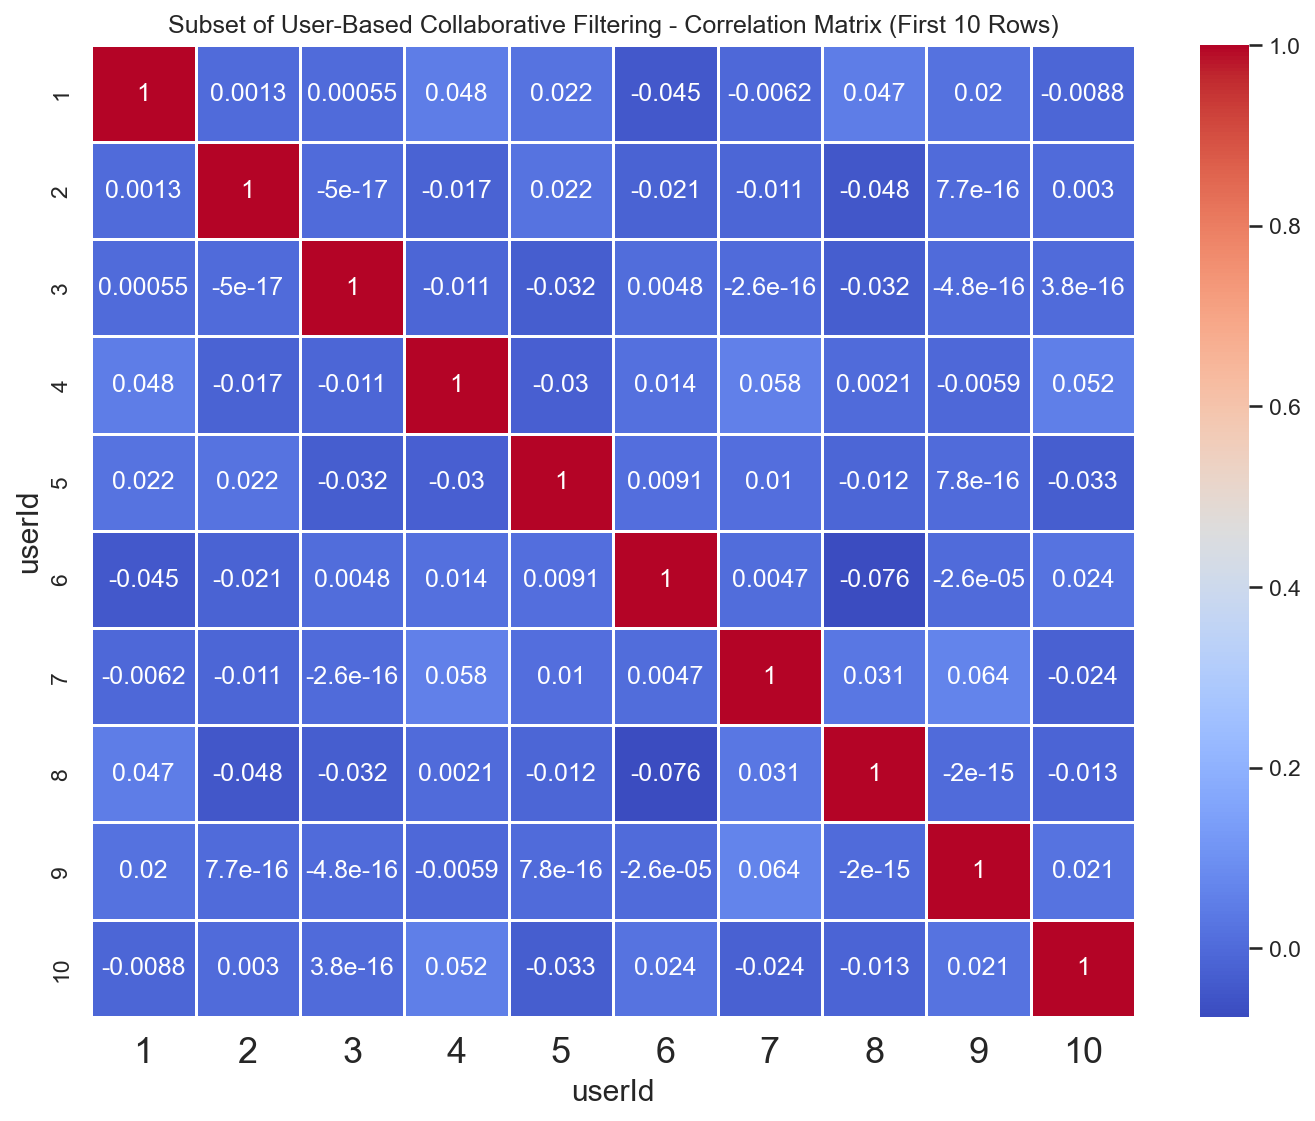

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming user_corr_mat is already calculated

# Subset the correlation matrix for the first 10 rows
subset_user_corr_mat = user_corr_mat.iloc[:10, :10]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_user_corr_mat, cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Subset of User-Based Collaborative Filtering - Correlation Matrix (First 10 Rows)')
plt.show()




In [53]:
from keras.layers import Input, Embedding, Dot, Flatten, Dense, Concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [54]:
ratings['userId'] = ratings['userId'].astype("category").cat.codes.values
ratings['movieId'] = ratings['movieId'].astype("category").cat.codes.values

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Assuming 'ratings' is the DataFrame containing your data
# And 'model' is your collaborative filtering model

# Separate features and target variable
X = ratings[['userId', 'movieId']]
y = ratings['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


# Now 'X_train_selected' and 'X_test_selected' contain the selected features

# Rest of your code...
# Build and train your model using X_train_selected and y_train
# Make predictions on X_test_selected
# Calculate metrics using the selected features


In [56]:
train, test = train_test_split(ratings, test_size=0.2, random_state=42)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Separate features and target variable
X_train = train[['userId', 'movieId']]
y_train = train['rating']
X_test = test[['userId', 'movieId']]
y_test = test['rating']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
embedding_size = 50

In [59]:
def build_model():
    # Input layers
    user_input = Input(shape=(1,), name='user_input')
    movie_input = Input(shape=(1,), name='movie_input')

    # Embedding layers
    user_embedding = Embedding(input_dim=len(ratings['userId'].unique()), output_dim=embedding_size, input_length=1)(user_input)
    movie_embedding = Embedding(input_dim=len(ratings['movieId'].unique()), output_dim=embedding_size, input_length=1)(movie_input)

    # Flatten the embeddings
    user_flatten = Flatten()(user_embedding)
    movie_flatten = Flatten()(movie_embedding)

    # Dot product of user and movie embeddings
    dot_product = Dot(axes=1)([user_flatten, movie_flatten])

    # Concatenate the embeddings
    concat = Concatenate()([user_flatten, movie_flatten])

    # Fully connected layers
    dense1 = Dense(50, activation='relu')(concat)
    dense2 = Dense(20, activation='relu')(dense1)

    # Output layer
    output = Dense(1, activation='relu')(dense2)

    # Create and compile the model
    model = Model(inputs=[user_input, movie_input], outputs=output)
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

    return model

In [60]:
model = build_model()
model.fit([train['userId'], train['movieId']], train['rating'], epochs=10, batch_size=64, validation_data=([test['userId'], test['movieId']], test['rating']))


Epoch 1/10
1261/1261 [==============================] - 21s 13ms/step - loss: 1.3583 - val_loss: 0.7951
Epoch 2/10
1261/1261 [==============================] - 17s 14ms/step - loss: 0.7136 - val_loss: 0.7690
Epoch 3/10
1261/1261 [==============================] - 17s 14ms/step - loss: 0.6636 - val_loss: 0.7715
Epoch 4/10
1261/1261 [==============================] - 17s 13ms/step - loss: 0.6281 - val_loss: 0.7578
Epoch 5/10
1261/1261 [==============================] - 18s 14ms/step - loss: 0.5921 - val_loss: 0.7702
Epoch 6/10
1261/1261 [==============================] - 18s 14ms/step - loss: 0.5583 - val_loss: 0.7793
Epoch 7/10
1261/1261 [==============================] - 18s 14ms/step - loss: 0.5247 - val_loss: 0.7950
Epoch 8/10
1261/1261 [==============================] - 19s 15ms/step - loss: 0.4927 - val_loss: 0.8052
Epoch 9/10
1261/1261 [==============================] - 19s 15ms/step - loss: 0.4595 - val_loss: 0.8294
Epoch 10/10
1261/1261 [==============================] - 18s 14m

In [61]:
# Save the model
model.save('my_model.h5')


In [62]:
predictions = model.predict([test['userId'], test['movieId']])

631/631 [==============================] - 2s 2ms/step


In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['rating'], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.8438249337577779


In [66]:
from sklearn.metrics import confusion_matrix

# Assuming you have binary predictions (e.g., ratings > threshold)
threshold = 3.5
binary_predictions = (predictions > threshold).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(test['rating'] > threshold, binary_predictions > threshold)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10477     0]
 [ 9691     0]]


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

threshold = 0.5  

# Convert predictions to binary (0 or 1) based on the threshold
binary_predictions = (predictions > threshold).astype(int)

# Convert ground truth ratings to binary (0 or 1) based on the threshold
binary_ground_truth = (test['rating'] > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(binary_ground_truth, binary_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1 score
precision = precision_score(binary_ground_truth, binary_predictions)
recall = recall_score(binary_ground_truth, binary_predictions)
f1 = f1_score(binary_ground_truth, binary_predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9855
Precision: 0.9862
Recall: 0.9992
F1 Score: 0.9927


In [68]:
from keras.layers import Dropout

def build_experimented_model():
    # Input layers
    user_input = Input(shape=(1,), name='user_input')
    movie_input = Input(shape=(1,), name='movie_input')

    # Embedding layers
    user_embedding = Embedding(input_dim=len(ratings['userId'].unique()), output_dim=embedding_size, input_length=1)(user_input)
    movie_embedding = Embedding(input_dim=len(ratings['movieId'].unique()), output_dim=embedding_size, input_length=1)(movie_input)

    # Flatten the embeddings
    user_flatten = Flatten()(user_embedding)
    movie_flatten = Flatten()(movie_embedding)

    # Dot product of user and movie embeddings
    dot_product = Dot(axes=1)([user_flatten, movie_flatten])

    # Concatenate the embeddings
    concat = Concatenate()([user_flatten, movie_flatten])

    # Fully connected layers with dropout for regularization
    dense1 = Dense(100, activation='relu')(concat)
    dropout1 = Dropout(0.5)(dense1)
    dense2 = Dense(50, activation='relu')(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    dense3 = Dense(20, activation='relu')(dropout2)

    # Output layer
    output = Dense(1, activation='relu')(dense3)

    # Create and compile the model
    model = Model(inputs=[user_input, movie_input], outputs=output)
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

    return model

# Build and train the experimented model
experimented_model = build_experimented_model()
experimented_model.fit([train['userId'], train['movieId']], train['rating'], epochs=10, batch_size=64, validation_data=([test['userId'], test['movieId']], test['rating']))


Epoch 1/10
1261/1261 [==============================] - 20s 14ms/step - loss: 1.4137 - val_loss: 0.8083
Epoch 2/10
1261/1261 [==============================] - 18s 14ms/step - loss: 0.8229 - val_loss: 0.7850
Epoch 3/10
1261/1261 [==============================] - 18s 15ms/step - loss: 0.7487 - val_loss: 0.7729
Epoch 4/10
1261/1261 [==============================] - 17s 14ms/step - loss: 0.6987 - val_loss: 0.7736
Epoch 5/10
1261/1261 [==============================] - 17s 13ms/step - loss: 0.6581 - val_loss: 0.7744
Epoch 6/10
1261/1261 [==============================] - 17s 14ms/step - loss: 0.6278 - val_loss: 0.7758
Epoch 7/10
1261/1261 [==============================] - 16s 13ms/step - loss: 0.5981 - val_loss: 0.7732
Epoch 8/10
1261/1261 [==============================] - 16s 13ms/step - loss: 0.5736 - val_loss: 0.7945
Epoch 9/10
1261/1261 [==============================] - 17s 13ms/step - loss: 0.5468 - val_loss: 0.7839
Epoch 10/10
1261/1261 [==============================] - 17s 13m

In [69]:
predictions = experimented_model.predict([test['userId'], test['movieId']])

631/631 [==============================] - 2s 3ms/step


In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['rating'], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.7870040485176873


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'predictions' is the array of predicted ratings and 'test['rating']' is the ground truth ratings
threshold = 0.5  # You may adjust the threshold based on your problem

# Convert predictions to binary (0 or 1) based on the threshold
binary_predictions = (predictions > threshold).astype(int)

# Convert ground truth ratings to binary (0 or 1) based on the threshold
binary_ground_truth = (test['rating'] > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(binary_ground_truth, binary_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1 score
precision = precision_score(binary_ground_truth, binary_predictions)
recall = recall_score(binary_ground_truth, binary_predictions)
f1 = f1_score(binary_ground_truth, binary_predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9857
Precision: 0.9857
Recall: 1.0000
F1 Score: 0.9928


In [72]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'model' is the basic factorization model and 'experimented_model' is the experimented factorization model

# Predictions on the test set
predictions_basic = model.predict([test['userId'], test['movieId']])
predictions_experimented = experimented_model.predict([test['userId'], test['movieId']])

# Calculate RMSE
rmse_basic = np.sqrt(mean_squared_error(test['rating'], predictions_basic))
rmse_experimented = np.sqrt(mean_squared_error(test['rating'], predictions_experimented))

# Print the RMSE values
print(f"RMSE for the Basic Factorization Model: {rmse_basic}")
print(f"RMSE for the Experimented Factorization Model: {rmse_experimented}")


631/631 [==============================] - 1s 2ms/step
RMSE for the Basic Factorization Model: 0.9185994414094633
RMSE for the Experimented Factorization Model: 0.8871324864515375


In [73]:
from keras.optimizers import Adam

embedding_size = 50

def build_improved_model():
    user_input = Input(shape=(1,), name='user_input')
    movie_input = Input(shape=(1,), name='movie_input')

    user_embedding = Embedding(input_dim=len(ratings['userId'].unique()), output_dim=embedding_size, input_length=1)(user_input)
    movie_embedding = Embedding(input_dim=len(ratings['movieId'].unique()), output_dim=embedding_size, input_length=1)(movie_input)

    user_flatten = Flatten()(user_embedding)
    movie_flatten = Flatten()(movie_embedding)

    dot_product = Dot(axes=1)([user_flatten, movie_flatten])
    concat = Concatenate()([user_flatten, movie_flatten])

    dense1 = Dense(64, activation='relu')(concat)
    dense2 = Dense(32, activation='relu')(dense1)

    output = Dense(1, activation='relu')(dense2)

    improved_model = Model(inputs=[user_input, movie_input], outputs=output)
    improved_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0005))

    return improved_model

improved_model = build_improved_model()
improved_model.fit([train['userId'], train['movieId']], train['rating'], epochs=10, batch_size=64, validation_data=([test['userId'], test['movieId']], test['rating']))

improved_predictions = improved_model.predict([test['userId'], test['movieId']])

improved_mse = mean_squared_error(test['rating'], improved_predictions)
print(f'Improved Mean Squared Error: {improved_mse}')


Epoch 1/10
1261/1261 [==============================] - 17s 13ms/step - loss: 1.4757 - val_loss: 0.7932
Epoch 2/10
1261/1261 [==============================] - 16s 12ms/step - loss: 0.7197 - val_loss: 0.7784
Epoch 3/10
1261/1261 [==============================] - 16s 13ms/step - loss: 0.6752 - val_loss: 0.7623
Epoch 4/10
1261/1261 [==============================] - 16s 13ms/step - loss: 0.6393 - val_loss: 0.7561
Epoch 5/10
1261/1261 [==============================] - 16s 13ms/step - loss: 0.6044 - val_loss: 0.7734
Epoch 6/10
1261/1261 [==============================] - 17s 13ms/step - loss: 0.5636 - val_loss: 0.7806
Epoch 7/10
1261/1261 [==============================] - 16s 12ms/step - loss: 0.5157 - val_loss: 0.7995
Epoch 8/10
1261/1261 [==============================] - 15s 12ms/step - loss: 0.4668 - val_loss: 0.8285
Epoch 9/10
1261/1261 [==============================] - 16s 13ms/step - loss: 0.4201 - val_loss: 0.8437
Epoch 10/10
631/631 [==============================] - 1s 2ms/st

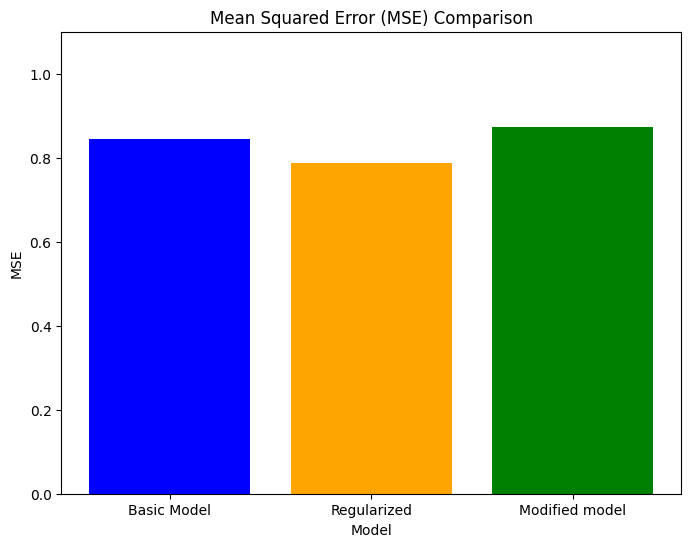

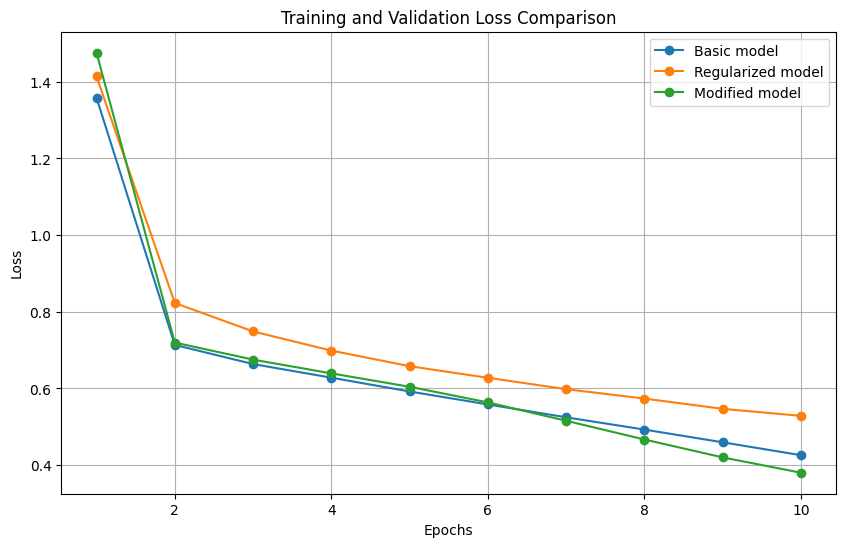

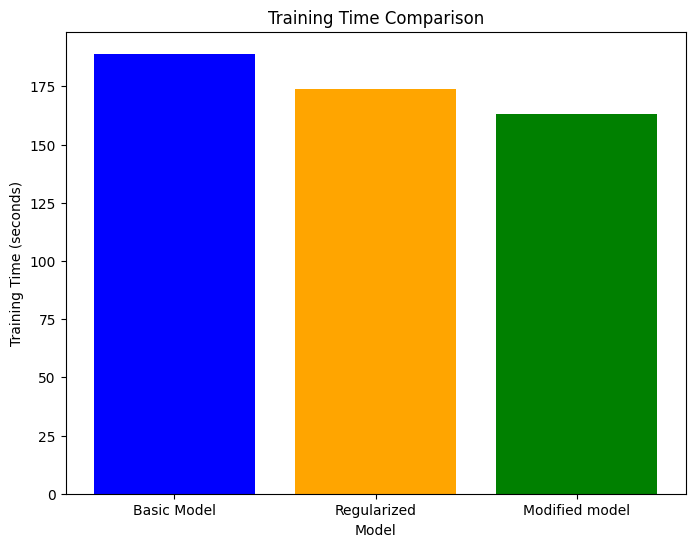

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Mean Squared Error (MSE) for each model
mse_basic = 0.8438249337577779 # Replace with actual MSE values
mse_experimented = 0.7870040485176873  # Replace with actual MSE values
mse_improved = 0.8730889157794818 # Replace with actual MSE values

# Training and validation loss over epochs for each model
epochs = range(1, 11)  # Assuming 10 epochs
loss_basic = [1.3583, 0.7136, 0.6636, 0.6281, 0.5921, 0.5583, 0.5247, 0.4927,  0.4595, 0.4259]  # Replace with actual loss values
loss_experimented = [1.4137,0.8229, 0.7487,0.6987,0.6581,0.6278,0.5981,0.5736,  0.5468, 0.5285]  # Replace with actual loss values
loss_improved = [1.4757, 0.7197, 0.6752, 0.6393, 0.6044,0.5636,0.5157,0.4668, 0.4201,0.3802]  # Replace with actual loss values

# Training times for each model (in seconds)
training_time_basic = 189  # Replace with actual training times
training_time_experimented = 174  # Replace with actual training times
training_time_improved = 163  # Replace with actual training times

# Plot MSE comparison
models = ['Basic Model', 'Regularized', 'Modified model']
mse_values = [mse_basic, mse_experimented, mse_improved]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.ylim(0, 1.1)  # Adjust ylim based on actual MSE values
plt.show()

# Plot training and validation loss comparison
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_basic, marker='o', label='Basic model')
plt.plot(epochs, loss_experimented, marker='o', label='Regularized model')
plt.plot(epochs, loss_improved, marker='o', label='Modified model')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training time comparison
training_times = [training_time_basic, training_time_experimented, training_time_improved]

plt.figure(figsize=(8, 6))
plt.bar(models, training_times, color=['blue', 'orange', 'green'])
plt.title('Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.show()


In [71]:
from keras.regularizers import l2

embedding_size = 50

def build_regularized_model():
    user_input = Input(shape=(1,), name='user_input')
    movie_input = Input(shape=(1,), name='movie_input')

    user_embedding = Embedding(input_dim=len(ratings['userId'].unique()), output_dim=embedding_size, input_length=1)(user_input)
    movie_embedding = Embedding(input_dim=len(ratings['movieId'].unique()), output_dim=embedding_size, input_length=1)(movie_input)

    user_flatten = Flatten()(user_embedding)
    movie_flatten = Flatten()(movie_embedding)

    dot_product = Dot(axes=1)([user_flatten, movie_flatten])
    concat = Concatenate()([user_flatten, movie_flatten])

    dense1 = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(concat)
    dropout1 = Dropout(0.5)(dense1)

    dense2 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dropout1)
    dropout2 = Dropout(0.5)(dense2)

    output = Dense(1, activation='relu')(dropout2)

    regularized_model = Model(inputs=[user_input, movie_input], outputs=output)
    regularized_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0005))

    return regularized_model

regularized_model = build_regularized_model()
regularized_model.fit([train['userId'], train['movieId']], train['rating'], epochs=10, batch_size=64, validation_data=([test['userId'], test['movieId']], test['rating']))

regularized_predictions = regularized_model.predict([test['userId'], test['movieId']])

regularized_mse = mean_squared_error(test['rating'], regularized_predictions)
print(f'Regularized Mean Squared Error: {regularized_mse}')


Epoch 1/10
1261/1261 [==============================] - 33s 22ms/step - loss: 2.8149 - val_loss: 0.9842
Epoch 2/10
1261/1261 [==============================] - 38s 30ms/step - loss: 1.5490 - val_loss: 0.8779
Epoch 3/10
1261/1261 [==============================] - 37s 29ms/step - loss: 1.3252 - val_loss: 0.8432
Epoch 4/10
1261/1261 [==============================] - 30s 23ms/step - loss: 1.1550 - val_loss: 0.8298
Epoch 5/10
1261/1261 [==============================] - 36s 28ms/step - loss: 1.0352 - val_loss: 0.8321
Epoch 6/10
1261/1261 [==============================] - 35s 28ms/step - loss: 0.9460 - val_loss: 0.8125
Epoch 7/10
1261/1261 [==============================] - 38s 31ms/step - loss: 0.8804 - val_loss: 0.8056
Epoch 8/10
1261/1261 [==============================] - 35s 28ms/step - loss: 0.8316 - val_loss: 0.8034
Epoch 9/10
1261/1261 [==============================] - 37s 29ms/step - loss: 0.7969 - val_loss: 0.8034
Epoch 10/10
631/631 [==============================] - 4s 5ms/st

In [73]:
import numpy as np

# Calculate mean squared error
regularized_mse = mean_squared_error(test['rating'], regularized_predictions)

# Calculate RMSE
regularized_rmse = np.sqrt(regularized_mse)
print(f'Regularized RMSE: {regularized_rmse:.4f}')


Regularized RMSE: 0.8955


In [72]:
from sklearn.metrics import accuracy_score

# Assuming 'regularized_predictions' is the array of predicted ratings and 'test['rating']' is the ground truth ratings
threshold = 0.5  # You may adjust the threshold based on your problem

# Convert predictions to binary (0 or 1) based on the threshold
regularized_binary_predictions = (regularized_predictions > threshold).astype(int)

# Convert ground truth ratings to binary (0 or 1) based on the threshold
binary_ground_truth = (test['rating'] > threshold).astype(int)

# Calculate accuracy
regularized_accuracy = accuracy_score(binary_ground_truth, regularized_binary_predictions)
print(f'Regularized Accuracy: {regularized_accuracy:.4f}')


Regularized Accuracy: 0.9857
